# **Case Study 03**
# **Kelompok C**

Anggota :
1. Ainun Syafna Maharani (2006571186)
2. Farah Tri Nurul Hayati (2006572882)
3. Irba Alifa Taqiyya (2006571223)
4. Laily Nur Azizah (2006464234)
5. Muhammad Jauhar Hakim (2006463982)
6. Muhammad Rayhan Nuansa Adha (2006571053)
7. Ni Made Lidya Anggreni (2006522700)
8. Raistra Aurel (2006572876)


## **Problem Statement**

AlfaIndo adalah sebuah toko waralaba yang memiliki beberapa cabang di kota-kota besar di Indonesia seperti Jakarta, Depok, Surabaya, dan Medan.

Anda adalah seorang Data Analyst yang bekerja di kantor pusat AlfaIndo di Jakarta.

Pasca masa pandemi Toko AlfaIndo cabang UI Depok mengalami penurunan laba yang signifikan.

Anda ditugaskan oleh pimpinan untuk membantu toko ALfaIndo cabang UI Depok untuk bangkit dari keterpurukannya.

## **Import Module**

In [ ]:
# Warning install "mlxtend" module first. Jalankan cell ini Hanya jika menggunakan Google Colaboratory:
# Jika menggunakan Jupyter notebook secara lokal (e.g. Anaconda/WinPython) silahkan install lewat terminal (e.g. command prompt)
try:
    import google.colab as gc_
    print("Running the code in Google Colab.", gc_) #IN_COLAB = True
    print("Installing required Module, please wait ... ")
    !pip install mlxtend 
    !pip install pycaret
except:
    !pip install mlxtend 
    !pip install pycaret
    print("Running the code locally, make sure to install required modules.")#IN_COLAB = False

Running the code in Google Colab. <module 'google.colab' from '/usr/local/lib/python3.7/dist-packages/google/colab/__init__.py'>
Installing required Module, please wait ... 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#import module yang dibutuhkan
import warnings; warnings.simplefilter('ignore')
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from itertools import combinations
from collections import Counter
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from pycaret.arules import *

%matplotlib inline
plt.style.use('bmh'); sns.set()

## **Data**

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/Jauhar-Hakim571/Case-Study-03-Data-Mining/main/data-cs3.csv')

In [ ]:
df

,ID Transaksi,Tanggal,Konsumen,ID Produk,Nama Produk,Merek,Jumlah
0,1.0,7/1/2022 0:00,Mr. A,1,Roti,Sri Roti,2
1,NaN,NaN,NaN,2,Air Minum,Aquos,1
2,NaN,NaN,NaN,11,Mie Instan,Indomi,2
3,NaN,NaN,NaN,12,Mie Instan,Mi Sedap,1
4,2.0,7/1/2022 0:00,Mr. B,2,Air Minum,Aquos,1
5,NaN,NaN,NaN,6,Snack,Chiki,2
6,NaN,NaN,NaN,3,Roti,Prambanan,1
7,NaN,NaN,NaN,5,Shampoo,Clean,1
8,3.0,7/2/2022 0:00,Mr. C,4,Sabun,Lifboy,1
9,NaN,NaN,NaN,5,Shampoo,Clean,1


In [ ]:
#Melihat informasi data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID Transaksi  18 non-null     float64
 1   Tanggal       18 non-null     object 
 2   Konsumen      18 non-null     object 
 3   ID Produk     56 non-null     int64  
 4   Nama Produk   56 non-null     object 
 5   Merek         56 non-null     object 
 6   Jumlah        56 non-null     int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 3.2+ KB


Note :

- Data penjualan AlfaIndo diberikan dalam format excel. Excel dapat digunakan untuk data yang tidak terlampau besar. Namun, file format csv lebih disarankan karena dapat digunakan untuk data yang kecil maupun besar. Oleh karena itu, format file yang diberikan diubah ke dalam format csv terlebih dahulu.

- Terdapat 38 baris pada kolom `ID Transaksi`, `Tanggal`, dan `Konsumen` yang nilainya null, sehingga akan dilakukan pre-processing pada ketiga kolom tersebut.

## **Pre Processing**

In [ ]:
#Mengisi baris 'NaN' sesuai dengan Konsumen, Tanggal, dan ID Transaksi
df['Konsumen'].fillna(method = 'ffill', inplace = True)
df['Tanggal'].fillna(method = 'ffill', inplace=True)
df['ID Transaksi'].fillna(method = 'ffill', inplace=True)
df.head()

,ID Transaksi,Tanggal,Konsumen,ID Produk,Nama Produk,Merek,Jumlah
0,1.0,7/1/2022 0:00,Mr. A,1,Roti,Sri Roti,2
1,1.0,7/1/2022 0:00,Mr. A,2,Air Minum,Aquos,1
2,1.0,7/1/2022 0:00,Mr. A,11,Mie Instan,Indomi,2
3,1.0,7/1/2022 0:00,Mr. A,12,Mie Instan,Mi Sedap,1
4,2.0,7/1/2022 0:00,Mr. B,2,Air Minum,Aquos,1


In [ ]:
#Mengubah tipe data
df['ID Transaksi']=df['ID Transaksi'].astype('object')
df['Tanggal']=df['Tanggal'].astype('datetime64') 
df['Nama Produk']=df['Nama Produk'].astype('category')
df['Merek']=df['Merek'].astype('category')

Note:

- Kolom `ID Transaksi` diubah dari float menjadi object

- Kolom `Tanggal` diubah dari tipe object menjadi datetime

- Kolom `Nama Produk` diubah dari object menjadi category

- Kolom `Merek` diubah dari object menjadi category 

In [ ]:
#Drop duplicates
df.shape #(lihat shape)
df.drop_duplicates()
df.shape #recheck shape

(56, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   ID Transaksi  56 non-null     object        
 1   Tanggal       56 non-null     datetime64[ns]
 2   Konsumen      56 non-null     object        
 3   ID Produk     56 non-null     int64         
 4   Nama Produk   56 non-null     category      
 5   Merek         56 non-null     category      
 6   Jumlah        56 non-null     int64         
dtypes: category(2), datetime64[ns](1), int64(2), object(2)
memory usage: 3.2+ KB


Note :

- Tipe data sudah sesuai dengan yang seharusnya.

## **EDA**

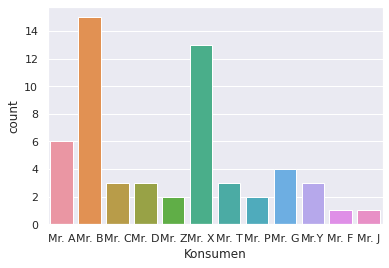

In [ ]:
sns.countplot(x='Konsumen',data=df)

Berdasarkan visualisasi di atas, Mr. B merupakan pelanggan yang paling banyak melakukan pembelian dengan jumlah pembelian 15 produk.

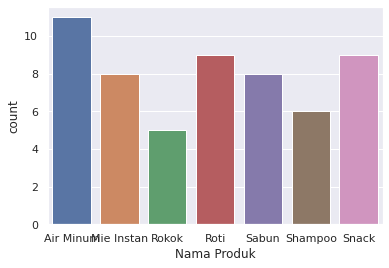

In [ ]:
sns.countplot(x='Nama Produk',data=df)

Berdasarkan bar plot diatas, Air minum merupakan produk yang paling laris dibeli oleh pelanggan, dan rokok merupakan produk yang paling dikit dibeli oleh pelanggan.

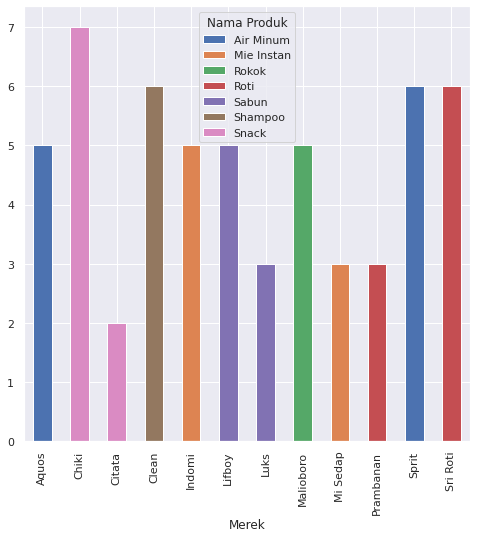

In [ ]:
CT=pd.crosstab(index=df['Merek'],columns=df['Nama Produk'])
CT.plot(kind="bar", figsize=(8,8), stacked=True)

Berdasarkan visualisasi di atas,
- untuk produk air minum, merek yang paling banyak dibeli adalah Sprit
- untuk produk snack, merek yang paling banyak dibeli adalah Chiki
- untuk produk roti, merek yang paling banyak dibeli adalah Sri roti
- untuk produk sabun, merek yang paling banyak dibeli adalah Lifboy
- untuk produk mie instan, merek yang paling banyak dibeli adalah Indomi

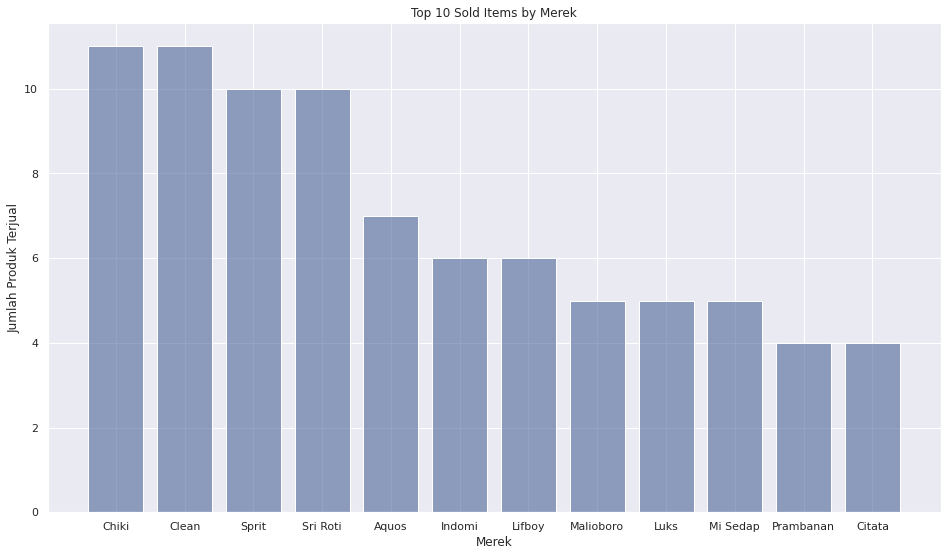

In [ ]:
## Creating distribution of Item Sold

Item_distr = df.groupby(by = 'Merek').size().reset_index(name='Jumlah').sort_values(by = 'Jumlah',ascending=False)

## Declaring variables

bars = Item_distr['Merek']
height = df.groupby(['Merek']).sum()['Jumlah'].sort_values(ascending=False)
x_pos = np.arange(len(bars))

## Defining Figure Size

plt.figure(figsize=(16,9))

# Create bars
plt.bar(x_pos, height, color=(0.3, 0.4, 0.6, 0.6))

# Add title and axis names
plt.title('Top 10 Sold Items by Merek')
plt.xlabel('Merek')
plt.ylabel("Jumlah Produk Terjual")

# Create names on the x-axis
plt.xticks(x_pos, bars)

# Show graph
plt.show()

Berdasarkan visualisasi di atas, pembelian produk berdasarkan merek yang paling banyak dibeli adalah produk 'Chiki' dan 'Clean' dengan jumlah pembelian masing-masing sebanyak 11 item. Kemudian dilanjutkan dengan produk 'Sprit' dan 'Sri Roti' dengan jumlah pembelian masing-masing sebanyak 10 item. Hal ini menunjukkan bahwa produk makanan merupakan rata-rata produk yang paling banyak dibeli.

## **Association Rule - Market Basket Analysis**

Akan dilakukan penggabungan jumlah dari masing-masing produk per transaksi, di sini kita menyatukan `ID Transaksi` dengan deskripsinya yaitu `Nama Produk`, dilihat jumlahnya.

In [ ]:
basket = df.groupby(['ID Transaksi', 'Nama Produk'])['Jumlah']
basket.head()

0     2
1     1
2     2
3     1
4     1
5     2
6     1
7     1
8     1
9     1
10    1
11    2
12    2
13    3
14    1
15    2
16    1
17    2
18    2
19    1
20    1
21    1
22    1
23    1
24    1
25    1
26    3
27    2
28    1
29    1
30    2
31    1
32    2
33    1
34    2
35    2
36    2
37    1
38    2
39    1
40    2
41    1
42    1
43    2
44    1
45    2
46    2
47    1
48    1
49    2
50    2
51    1
52    1
53    2
54    2
55    2
Name: Jumlah, dtype: int64

In [ ]:
#Jumlahkan, unstack, Null=0, index baris menggunakan ID Transaksi
basket=basket.sum().unstack()
basket.columns = basket.columns.add_categories(['ID Transaksi'])
basket=basket.reset_index().fillna(0).set_index('ID Transaksi')
basket

Nama Produk,Air Minum,Mie Instan,Rokok,Roti,Sabun,Shampoo,Snack
ID Transaksi,,,,,,,
1.0,1,3,0,2,0,0,0
2.0,1,0,0,1,0,1,2
3.0,0,0,1,0,1,1,0
4.0,2,2,0,2,1,0,3
5.0,2,0,0,0,0,0,1
6.0,0,2,0,0,1,1,0
7.0,1,0,1,0,0,0,0
8.0,0,3,0,0,1,1,1
9.0,1,2,1,2,1,0,2


In [ ]:
#Encode the data
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_sets = basket.applymap(encode_units) # one-hot encoding
basket_sets.head()

Nama Produk,Air Minum,Mie Instan,Rokok,Roti,Sabun,Shampoo,Snack
ID Transaksi,,,,,,,
1.0,1,1,0,1,0,0,0
2.0,1,0,0,1,0,1,1
3.0,0,0,1,0,1,1,0
4.0,1,1,0,1,1,0,1
5.0,1,0,0,0,0,0,1


Di sini, dibuat fungsi yang disebut `encode_units` yang mengkodekan unit. Jika unit sama dengan atau kurang dari 0, unit akan berubah menjadi 0 (Tidak dibeli). Jika unit lebih dari atau sama dengan 1, maka unit akan menjadi 1 (dibeli). Dengan cara ini, kami menghasilkan dataframe yang menunjukkan apakah barang tertentu dibeli atau tidak

In [ ]:
#Melihat kolom
basket_sets.columns

CategoricalIndex(['Air Minum', 'Mie Instan', 'Rokok', 'Roti', 'Sabun',
                  'Shampoo', 'Snack'],
                 categories=['Air Minum', 'Mie Instan', 'Rokok', 'Roti', 'Sabun', 'Shampoo', 'Snack', 'ID Transaksi'], ordered=False, dtype='category', name='Nama Produk')

In [ ]:
#Melihat index
basket_sets.index

Float64Index([ 1.0,  2.0,  3.0,  4.0,  5.0,  6.0,  7.0,  8.0,  9.0, 10.0, 11.0,
              12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0],
             dtype='float64', name='ID Transaksi')

In [ ]:
#Algoritma Apriori digunakan untuk menemukan item yang sering dibeli (terlaris)
frequent_itemsets = apriori(basket_sets, min_support=0.07, use_colnames=True)
frequent_itemsets.sort_values(by='support', ascending=False, na_position='last', inplace = True)
frequent_itemsets

,support,itemsets
0,0.611111,(Air Minum)
3,0.500000,(Roti)
6,0.500000,(Snack)
4,0.444444,(Sabun)
9,0.444444,"(Roti, Air Minum)"
11,0.388889,"(Snack, Air Minum)"
27,0.333333,"(Snack, Roti, Air Minum)"
5,0.333333,(Shampoo)
1,0.333333,(Mie Instan)
19,0.333333,"(Snack, Roti)"


Dengan menggunakan algoritma apriori, kita dapat melihat produk-produk yang paling laris dibeli dengan menggunakan nilai support. Dalam hal ini kita mendefinisikan produk laris sebagai produk yang telah dijual sebesar 8% dari transaksi keseluruhan, artinya kita akan memberikan nilai support sebesar 0,08. 

Seperti yang dilihat, ada 41 transaksi yang dianggap sebagai produk laris. Terlihat pada dataframe bahwa Air Minum merupakan produk terlaris, dengan Roti, dan Snack masing-masing. Dalam hal bundling, Roti dan Air Minum merupakan transaksi bundle yang paling sering dibeli dengan nilai support sebesar 0.444. Artinya barang tersebut paling sering dibeli berdua dari keseluruhan.

In [ ]:
#Menemukan Hubungan (Association) Antara Barang Yang Sering Dibeli
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.sort_values(by='lift', ascending=False, na_position='last', inplace = True)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
158,"(Mie Instan, Snack, Roti)","(Sabun, Air Minum)",0.111111,0.166667,0.111111,1.000000,6.0,0.092593,inf
159,"(Mie Instan, Snack, Air Minum)","(Sabun, Roti)",0.111111,0.166667,0.111111,1.000000,6.0,0.092593,inf
162,"(Sabun, Roti)","(Mie Instan, Snack, Air Minum)",0.166667,0.111111,0.111111,0.666667,6.0,0.092593,2.666667
163,"(Sabun, Air Minum)","(Mie Instan, Snack, Roti)",0.166667,0.111111,0.111111,0.666667,6.0,0.092593,2.666667
123,"(Mie Instan, Air Minum)","(Sabun, Roti)",0.166667,0.166667,0.111111,0.666667,4.0,0.083333,2.500000
...,...,...,...,...,...,...,...,...,...
69,(Snack),(Mie Instan),0.500000,0.333333,0.166667,0.333333,1.0,0.000000,1.000000
135,(Mie Instan),"(Roti, Snack)",0.333333,0.333333,0.111111,0.333333,1.0,0.000000,1.000000
134,"(Roti, Snack)",(Mie Instan),0.333333,0.333333,0.111111,0.333333,1.0,0.000000,1.000000
105,"(Roti, Snack, Air Minum)",(Mie Instan),0.333333,0.333333,0.111111,0.333333,1.0,0.000000,1.000000


Dari hasil `association_rule` kita dapat lihat bahwa Sabun dan Roti paling sering dibeli dengan Snack, Air Minum, dan Mie dengan lift sebesar 6, item-item tersebut memiliki asosiasi tertinggi karena memiliki nilai lift tinggi.

In [ ]:
#Melakukan filtering untuk association rule
rules[ (rules['lift'] >= 5) & (rules['confidence'] >= 0.7) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
158,"(Mie Instan, Snack, Roti)","(Sabun, Air Minum)",0.111111,0.166667,0.111111,1.0,6.0,0.092593,inf
159,"(Mie Instan, Snack, Air Minum)","(Sabun, Roti)",0.111111,0.166667,0.111111,1.0,6.0,0.092593,inf


Setelah melakukan filtering `rules` dengan mencari nilai lift yang lebih besar sama dengan 5 dan confidence lebih besar sama dengan 0.7, dilihat bahwa hanya terdapat 2 produk yang memiliki asosiasi sesuai dengan kriteria yang kita definisikan, yaitu pembelian Sabun, Roti dengan Snack, Air Minum, Mie Instan serta pembelian Sabun, Air Minum dengan Snack, Roti, Mie Instan.

## **Kesimpulan**

Dari EDA didapatkan kesimpulan
- Merek dengan penjualan terbanyak adalah Chiki dan Clean sedangkan yang tedikit adalah Prambanan dan Chitata
- Jumlah barang yang dibeli Mr.B dan Mr.X merupakan kedua terbanyak dari pelanggan lainnya

Dengan menggunakan algoritma apriori didapatkan assosiaction rule yaitu
- Ketika pelanggan membeli (Air Minum, Snack, Mie Instan) biasanya juga membeli (Roti, Sabun)
- Ketika pelanggan membeli (Roti, Snack, Mie Instan) biasanya juga membeli (Air Minum, Sabun)

## **Rekomendasi**

- Dengan strategi pemasaran targeting, perusahaan disarankan untuk menawarkan kepada semua konsumen, terutama Mr. B dan Mr. X member loyalty AlfaIndo agar agar Mr.B dan Mr.X tetap loyal belanja di AlfaIndo sedangkan untuk pelanggan lainnya ditawarkan juga agar semakin banyak membeli. Member loyalty digunakan untuk mengumpulkan point. Semakin banyak membeli produk maka point yang terkumpul juga akan banyak dan point tersebut dapat dipakai konsumen sebagai potongan harga jika membeli produk selanjutnya.

- Membuat paket bundling antara produk yang banyak penjualannya dan produk yang kurang jumlah penjualannya, beberapa rekomendasi paket bundling diantaranya adalah:
  1. Roti merek Prambanan dengan air minum merek sprit.
  2. Sampo merek clean dengan sabun merk luks.
  3. Snack merek chiki dengan snack merek citata.
  
    dsb.

- Karena confidence kedua rulenya 1 atau sangat besar dapat menggunakan strategi pemasaran positioning dengan menjauhkan letak produk antara Air Minum, Snack, dan Mie Instan dengan Roti dan Sabun. Strategi pemasaran tersebut bertujuan agar konsumen dapat melihat-lihat produk lainnya. 

- Produk yang dijual AlfaIndo kurang bervariatif sehingga disarankan untuk menambahkan jenis produk lainnya, seperti kebutuhan pokok atau kosmetik dari berbagai merek. 

- Pada hari-hari tertentu misalnya Hari Kemerdekaan atau ulang tahun perusahaan diberikan promo diskon dengan minimum pembelanjaan atau promo buy 2 get 1 seperti setiap pembelian 2 produk Prambanan bonus 1 produk Chitata.

## **Rekomendasi untuk Data Engineer AlfaIndo**

1. Menambahkan variabel lain berupa harga produk agar dapat dianalisis mengapa suatu produk memiliki nilai penjualan yang tinggi ataupun rendah.
2. Tetap mengisi seluruh elemen dalam dataset meskipun isinya sama dengan atasnya (jangan menyimpan dalam dalam bentuk groupby) yang bertujuan untuk memudahkan data analyst dalam menganalisis data.